In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

print("Library siap digunakan.")

Library siap digunakan.


In [2]:
# Langkah 1: Ambil contoh sinyal suara
file_path = '/kaggle/input/melody/melody.MP3'

# Membaca file audio dan sample rate-nya
y, sr = librosa.load(file_path)

# Langkah 2: Hitung spektrum frekuensi dengan FFT
fft_vals = np.fft.fft(y)
fft_freqs = np.fft.fftfreq(len(y), 1.0/sr)

# Mengambil hanya bagian frekuensi positif (karena spektrumnya simetris)
positive_mask = fft_freqs >= 0
freqs = fft_freqs[positive_mask]
magnitudes = np.abs(fft_vals[positive_mask])

print(f"Sinyal audio berhasil dimuat. Sample rate: {sr} Hz.")
print(f"FFT berhasil dihitung. Total titik frekuensi: {len(freqs)}.")

Sinyal audio berhasil dimuat. Sample rate: 22050 Hz.
FFT berhasil dihitung. Total titik frekuensi: 76032.


In [3]:
# Mencari puncak (peaks) pada spektrum frekuensi
# 'height' bisa disesuaikan untuk memfilter noise
peaks, _ = find_peaks(magnitudes, height=100, distance=50)

# Mengurutkan puncak berdasarkan kekuatan amplitudonya dan mengambil 5 teratas
sorted_peak_indices = np.argsort(magnitudes[peaks])[::-1]
dominant_peak_indices = peaks[sorted_peak_indices[:5]]

dominant_freqs = freqs[dominant_peak_indices]
dominant_mags = magnitudes[dominant_peak_indices]

print("--- 5 Frekuensi Dominan yang Ditemukan ---")
for freq, mag in zip(dominant_freqs, dominant_mags):
    print(f"Frekuensi: {freq:.2f} Hz")

--- 5 Frekuensi Dominan yang Ditemukan ---
Frekuensi: 220.55 Hz
Frekuensi: 194.02 Hz
Frekuensi: 247.38 Hz
Frekuensi: 279.28 Hz
Frekuensi: 165.89 Hz


In [4]:
# Membuat spektrum baru yang hanya berisi frekuensi dominan
filtered_fft_vals = np.zeros_like(fft_vals)
for i in dominant_peak_indices:
    filtered_fft_vals[i] = fft_vals[i] # Bagian positif
    if i != 0:
        filtered_fft_vals[-i] = fft_vals[-i] # Bagian negatif (simetris)

# Melakukan Inverse Fast Fourier Transform (IFFT) untuk merekonstruksi sinyal
reconstructed_signal = np.fft.ifft(filtered_fft_vals).real

print("Sinyal berhasil direkonstruksi dari frekuensi dominan.")

Sinyal berhasil direkonstruksi dari frekuensi dominan.


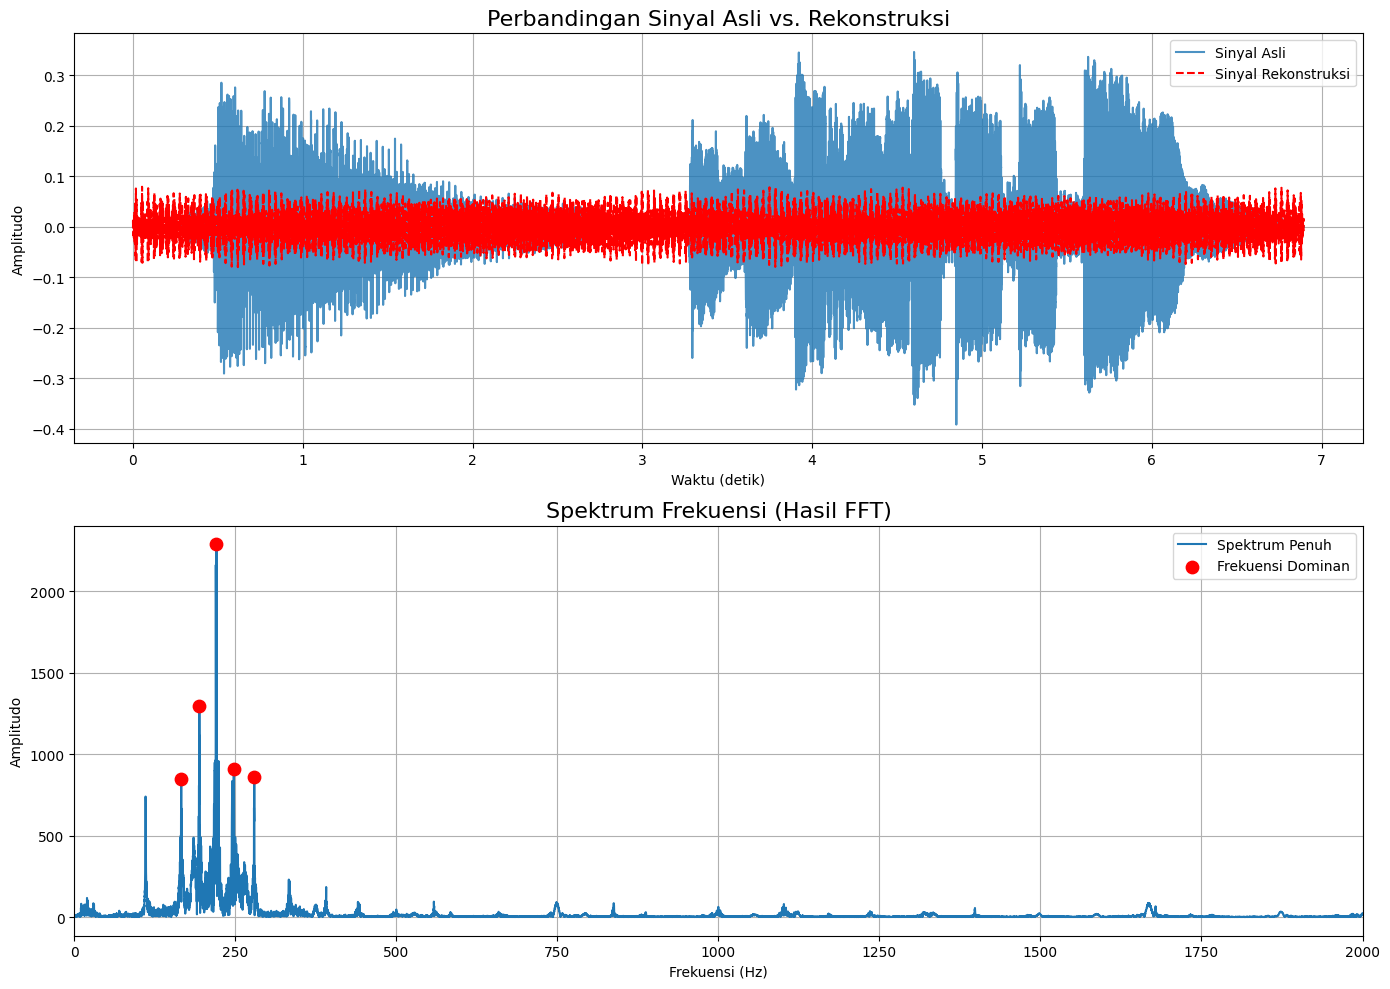

In [5]:
# Membuat time axis untuk plot
time = np.arange(len(y)) / sr

# Membuat 2 plot dalam satu gambar
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Sinyal dalam Domain Waktu
ax1.plot(time, y, label='Sinyal Asli', alpha=0.8)
ax1.plot(time, reconstructed_signal, label='Sinyal Rekonstruksi', color='red', linestyle='--')
ax1.set_title('Perbandingan Sinyal Asli vs. Rekonstruksi', fontsize=16)
ax1.set_xlabel('Waktu (detik)')
ax1.set_ylabel('Amplitudo')
ax1.legend()
ax1.grid(True)

# Plot 2: Sinyal dalam Domain Frekuensi
ax2.plot(freqs, magnitudes, label='Spektrum Penuh')
ax2.scatter(dominant_freqs, dominant_mags, color='red', s=80, zorder=5, label='Frekuensi Dominan')
ax2.set_title('Spektrum Frekuensi (Hasil FFT)', fontsize=16)
ax2.set_xlabel('Frekuensi (Hz)')
ax2.set_ylabel('Amplitudo')
ax2.set_xlim(0, 2000) # Batasi plot hingga 2000 Hz agar puncak lebih jelas
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Analisis dan Refleksi

* **Analisis Sinyal Waktu:** Pada grafik pertama, bandingkan bentuk gelombang sinyal asli (biru) dengan sinyal hasil rekonstruksi (merah). Apakah bentuknya mirip? Apakah sinyal rekonstruksi berhasil menangkap "irama" atau "pola" utama dari sinyal asli?
* **Analisis Spektrum Frekuensi:** Pada grafik kedua, jelaskan apa arti dari puncak-puncak yang terdeteksi. Puncak-puncak ini mewakili nada-nada dasar atau frekuensi utama yang membentuk suara musik tersebut.
* **Refleksi:** Apa yang Anda pelajari dari proses ini? Misalnya, Anda bisa menyimpulkan bahwa sebuah sinyal musik yang kompleks ternyata dapat diwakili oleh beberapa frekuensi dominan saja. Diskusikan juga jika ada perbedaan antara sinyal asli dan hasil rekonstruksi, dan mengapa itu bisa terjadi (misalnya, karena kita hanya menggunakan 5 frekuensi).